![LogoUC3M](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg/320px-Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg.png)

*Alonso Rios Guerra - 100495821 | Guillermo Sancho González - 100495991*


# *__Aprendizaje automático P1: Predicción del abandono de empleados__*

## *__1. Introducción__*

En esta práctica tenemos como objetivo desarrollar diferentes métodos de aprendizaje automático para predecir el abandono de los trabajadores de una empresa.

Primero de todo empezaremos leyendo los datos que nos proporciona la empresa. En nuestro caso, usaremos el dataset Nº10.

In [2]:
import numpy as np
import pandas as pd

data_path = 'attrition_availabledata_10.csv.gz'

data = pd.read_csv(data_path, compression='gzip', sep = ',')

## *__2. EDA Simplificado__*



Un EDA es una análisis exploratorio de datos, para organizar los datos, entender su contenido, entender cual son las variables más relevantes y cómo se relacionan unas con otras, determinar qué hacer con los datos faltantes y con los datos atípicos, y finalmente extraer conclusiones acerca de todo este análisis.

Para hacer un eda debemos responder a distintas preguntas:

-   ¿Cuántas instancias y atributos hay?

-   ¿Qué tipo de atributos hay (numéricos o categóricos)? Esto se hace para verificar si hay características categóricas que deben ser codificadas (como variables dummy o one-hot encoding). Comprobar si hay variables categóricas con alta cardinalidad.

-   ¿Qué atributos tienen valores faltantes y cuántos?

-   ¿Existen columnas constantes o ID?

-   ¿Es un problema de clasificación o regresión (variable de respuesta) y? En caso de clasificación, ¿las clases están desbalanceadas?

A continuación le damos respuesta:

-   ¿Cuántas instancias y atributos hay?

In [3]:
print('La forma de la tabla es:', data.shape)

La forma de la tabla es: (2940, 31)


El dataset contiene 2940 instancias, 30 atributos y 1 etiqueta (Attrition).

-   ¿Qué tipo de atributos hay (numéricos o categóricos)? Esto se hace para verificar si hay características categóricas que deben ser codificadas (como variables dummy o one-hot encoding). Comprobar si hay variables categóricas con alta cardinalidad.

In [4]:
print('Los tipos de atributos son:')
print('==================================')
print(data.dtypes)

Los tipos de atributos son:
hrs                        float64
absences                     int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany             

Existen dos tipos de atributos en nuestro dataset: numéricos y categóricos. Dentro de los numéricos encontramos de tipo entero (absences, Age, JobLevel, ...) y de tipo float (hrs, TotalWorkingYears, JobSatisfaction). En cuanto a lo atributos categóricos encontramos algunos como Department, JobRole, MaritalStatus, ... Para entrenar a nuestro modelo nos interesa codificar las variables categóricas y por ello es importante ver como de viable es según su cardinalidad.

In [5]:
columnas_cat = data.select_dtypes(include=['object']).columns # Selecciona las columnas categóricas

print('Cardinalidad de los atributos categóricos:')
print('================================')
for col in columnas_cat: # Imprime la cardinalidad de cada atributo categórico
    print(f"{col}: {data[col].nunique()} categorías únicas")

Cardinalidad de los atributos categóricos:
BusinessTravel: 3 categorías únicas
Department: 3 categorías únicas
EducationField: 6 categorías únicas
Gender: 2 categorías únicas
JobRole: 9 categorías únicas
MaritalStatus: 3 categorías únicas
Over18: 1 categorías únicas
Attrition: 2 categorías únicas


Al observar la ejecución del código anterior vemos que la cardinalidad de nuestros atributos categóricos es baja, en un rango de [2-9], y por ello no implicará ningún problema a la hora realizar una codificación dummy o One-Hot Encoding.

-   ¿Qué atributos tienen valores faltantes y cuántos?

In [6]:
print('Cuántos valores faltan por atributo:')
print('====================================')
sin_valor = data.isnull().sum()  # Cuenta valores nulos por columna
sin_valor = sin_valor[sin_valor > 0]  # Filtra solo los que tienen valores nulos

print(sin_valor)

Cuántos valores faltan por atributo:
EnvironmentSatisfaction    15
JobSatisfaction            12
WorkLifeBalance            29
NumCompaniesWorked         17
TotalWorkingYears           5
dtype: int64


Tras ejecutar el código anterior, obtenemos que existen 5 atributos con valores faltantes. Estos atributos son:
EnvironmentSatisfaction con 15 faltantes,
JobSatisfaction con 12 faltantes,
WorkLifeBalance con 29 faltantes,
NumCompaniesWorked con 17 faltantes y
TotalWorkingYears con 5 faltantes.

- ¿Existen columnas constantes o ID?

In [7]:
# 1. Comprobar columnas constantes
constantes = [col for col in data.columns if data[col].nunique() == 1]
print("Columnas constantes:", constantes)

# 2. Comprobar columnas ID
columnas_id = [col for col in data.columns if data[col].nunique() == len(data)]
print("Columnas ID:", columnas_id)


Columnas constantes: ['EmployeeCount', 'Over18', 'StandardHours']
Columnas ID: ['EmployeeID']


Observamos que existen 3 columnas constantes (EmployeeCount, Over18, StandardHours) y una columna ID (EmployeeID)

- ¿Es un problema de clasificación o regresión (variable de respuesta) y? En caso de clasificación, ¿las clases están desbalanceadas?


En este caso es fácil ver que es un problema de __clasificación__ porque la etiqueta (Attrition) en los datos train solo pueden tener valores 'Yes' o 'No', por lo que es una clase binaria.

In [8]:
print('Comprobar si la clase está desbalanceada:')
print('======================================')
print(data['Attrition'].value_counts())
print()
print(data['Attrition'].value_counts() / data['Attrition'].count())

Comprobar si la clase está desbalanceada:
Attrition
No     2466
Yes     474
Name: count, dtype: int64

Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64


Se puede ver que la clase esta bastante desbalanceada: 83.88% No, 16.12% Yes

## *__3. ¿Cómo se va a realizar la evaluación?__*

Para realizar la evaluación de nuestro modelo vamos a seguir una serie de pasos. La evaluación estará divida en inner, donde se elegirá el mejor classifier con el mejor scaler, imputer y ajuste de hiperparámetros, y outer, donde se estimará el rendimiento a futuro del modelo. Es importante dividir nuestro dataset en datos de entrenamiento (usados en inner) y de validación (usados en outer). En nuestro caso seguiremos el Holdout ((2/3) Train y (1/3) Test).

- Inner Evaluation

    - Primero, determinamos el mejor scaler e imputer. Para ello compararemos el score de hacer la cross-validation con 3 folds para KNN con los hiperparámetros por defecto variando el scaler (Standard, MinMax y Robust) y el imputer (Mean y Median).

    - Una vez obtenido el mejor scaler e imputer, procederemos a buscar el mejor modelo. Para ello compararemos la precision de distintos modelos como KNN, Trees y Linear y SVM. Cada uno se comprobara con los hiper parámetros default y con los hiper parámetros optimizados.

    - Con el mejor modelo elegido, pasaremos a la Outer Evaluation.

- Outer Evaluation

    - Con el mejor modelo obtenido en la fase de evaluación interna, validaremos su entrenamiento haciendo uso de la partición de datos TEST (1/3). Esto nos permitirá estimar el rendimiento del modelo elegido con vista a futuro.

Además, una vez realizadas ambas evaluaciones, someteremos a nuestro modelo a unos datos de competición que nos devolverán ciertas predicciones.

## *__4. Metodos básicos: KNN y Tree__*


Inicialmente vamos a eliminar las columnas constantes o ids que consideramos que no aportan información útil al modelo.

In [9]:
data = data.drop(columns=constantes + columnas_id)

Se dividen los datos en x e y, donde x son los inputs, e y es la etiqueta

Despues se vuelven a dividir en train y en test. Train contiene el 66% de los datos y se usará para la evaluación interna, y test contiene el 33% de los datos y se usará para la evaluación final. Los valores estarán estratificados porque las clases están muy desbalanceadas, es decir, la proporción de positivos y negativos en train y test será igual que la del conjunto de datos original.


In [10]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['Attrition'])
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify= y)


Se busca que haya una accuracy mínima de 0.8388 porque al estar las clases tan desbalanceadas esa sería la tasa de aciertos de un clasificador "dummy".
En el caso de la balanced accuracy, debe ser mayor a 0.5, que sería el valor del dummy classifier

### *__4.1 - K-nearest neigbors__*


Iterar entre los diversos metodos de escalado e imputación para ver cual es mejor   

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix

#Separar variables categoricas y numéricas
columnas_num = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
columnas_cat = X.select_dtypes(include=['object']).columns.tolist()


#Distintos métodos de escalado e imputación
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
imputers = ['mean', 'median']

#Se realiza una crossvalidation estratificada con 3 folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

accuracy = -np.inf
best_scaler, best_imputer = None, None

# Definir los pasos en la Pipeline
knn = KNeighborsClassifier()
encoder = OneHotEncoder()

# Pipeline para valores categóricos
classif_categoricos = Pipeline([
            ("encoder", encoder),
            ("imputation", SimpleImputer(strategy='most_frequent'))
        ])


for i in range(len(imputers)):
    for j in range(len(scalers)):
        scaler = scalers[j]
        imputer = SimpleImputer(strategy=imputers[i])

        classif_numericos = Pipeline([
            ("imputation", imputer),
            ("standardization", scaler)
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", classif_numericos, columnas_num),
                ("cat", classif_categoricos, columnas_cat)
            ]
        )

        clf = Pipeline([("preprocessor", preprocessor), ("classifier", knn)])

        """clf.fit(X_train, y_train)
        scr = cross_val_score(clf, X_train, y_train, scoring='balanced_accuracy', cv=cv)
        print(f"Resultado de cross_val_score = {scr.mean()}")"""

        scr = cross_validate(clf, X_train, y_train, scoring='balanced_accuracy', cv=cv, return_train_score=True)

        mean_test_score = scr["test_score"].mean()
        mean_train_score = scr["train_score"].mean()

        print(f"Test score = {mean_test_score}, Train score = {mean_train_score}")

        if mean_test_score > accuracy:
            accuracy = mean_test_score
            best_scaler, best_imputer = scalers[j], imputers[i]

print(f"Best balanced accuracy: {accuracy}. With scaler: {best_scaler}, imputer: {best_imputer}")

Test score = 0.5903895676619819, Train score = 0.6948935859441966
Test score = 0.5947864542686192, Train score = 0.708596252294578
Test score = 0.5954556086769281, Train score = 0.6916195739374382
Test score = 0.5903895676619819, Train score = 0.696477126153329
Test score = 0.5947864542686192, Train score = 0.7076542947525755
Test score = 0.5948473361708454, Train score = 0.69240946335292
Best balanced accuracy: 0.5954556086769281. With scaler: RobustScaler(), imputer: mean


El mejor scaler e imputer son ...

Una vez sabemos cual es el mejor scaler y el mejor imputer, hacemos el mismo proceso hecho antes, pero para elegir los mejores hiperparámetros del KNN.

In [43]:
from sklearn.model_selection import GridSearchCV


classif_numericos = Pipeline([
    ("imputation", SimpleImputer(strategy=best_imputer)),
    ("standardization", best_scaler)
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", classif_numericos, columnas_num),
        ("cat", classif_categoricos, columnas_cat)
    ]
)

clf = Pipeline([("preprocessor", preprocessor), ("classifier", knn)])

knn_grid = {"classifier__n_neighbors": [1, 2, 3, 4, 8, 16, 32], "classifier__metric": ["euclidean", "manhattan"]}

grid = GridSearchCV(clf, knn_grid, cv=cv, scoring='balanced_accuracy')
grid.fit(X_train, y_train)

print(f"knn con HPO = {grid.best_score_}")
print("Mejores hiperparámetros:", grid.best_params_)



knn con HPO = 0.7874298546485573
Mejores hiperparámetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 1}


Los hiperparámetros optimizados obtenidos son que el valor de K (n-neighbors) sea 1 y se utilize la distancia de Manhattan (p=1).

Se va a generar un plot para ver el efecto del cambio del hiperparámetro n-neighbors y la métrica

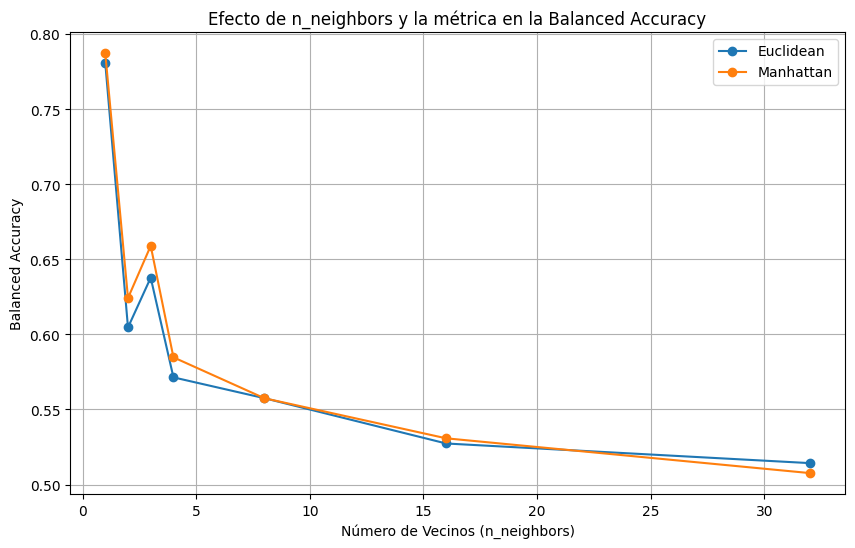

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

resultados = grid.cv_results_

neighbors = resultados['param_classifier__n_neighbors'].data
metrics = resultados['param_classifier__metric'].data
scores = resultados['mean_test_score']

# Filtrar los resultados por métrica
euclidean_scores = [score for n, m, score in zip(neighbors, metrics, scores) if m == 'euclidean']
manhattan_scores = [score for n, m, score in zip(neighbors, metrics, scores) if m == 'manhattan']
neighbors_values = np.unique(neighbors)

# Crear los gráficos de líneas
plt.figure(figsize=(10, 6))
plt.plot(neighbors_values, euclidean_scores, label='Euclidean', marker='o')
plt.plot(neighbors_values, manhattan_scores, label='Manhattan', marker='o')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.ylabel('Balanced Accuracy')
plt.title('Efecto de n_neighbors y la métrica en la Balanced Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Se observa que cuantos menos neighbors haya, mayor será el balanced accuracy (siendo el valor con mayor balanced_accuracy n_neighbors=1).   
Esto puede suponer que está ocurriendo overfitting en el modelo porque se esta sobreadaptando al ruido de los datos train.

El cambio de la metrica (elegir entre distancia euclída o distancia de Manhattan) no parece variar mucho pero es ligeramente mejor la distancia de Manhattan

### *__4.2 - Decission Tree__*
Decision Tree con los hiperparámetros por defecto

In [46]:
from sklearn import tree

clf = Pipeline([("preprocessor", preprocessor), ("classifier", tree.DecisionTreeClassifier())])

clf.fit(X_train, y_train)

#Para ver el arbol 
"""
fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(clf.named_steps["classifier"],
                feature_names = clf.named_steps["preprocessor"].get_feature_names_out(),
                class_names= ['No', 'Yes'],
                filled=True)
"""

scr = cross_validate(clf, X_train, y_train, scoring='balanced_accuracy', cv=cv, return_train_score=True)
mean_test_score = scr["test_score"].mean()
mean_train_score = scr["train_score"].mean()
print(f"Test score = {mean_test_score}, Train score = {mean_train_score}")



Test score = 0.7577591634367561, Train score = 1.0


Ajuste de hiperparámetros para el arbol:

Primero elegimos el criterio utilizado

In [50]:
tree_grid = {
    'classifier__criterion': ['gini', 'entropy'],  # Función de evaluación
    'classifier__max_depth': [1, 2, 4, 8, 16, None],  # Profundidad máxima del árbol
    'classifier__min_samples_split': [2, 10, 20, 30, 100],  # Mínimo de muestras para dividir un nodo
    'classifier__min_impurity_decrease': [0.0, 0.01, 0.05]  # Umbral para crear nuevas divisiones
}

grid = GridSearchCV(clf, tree_grid, cv=cv, scoring='balanced_accuracy')
grid.fit(X_train, y_train)
print(f"knn con HPO = {grid.best_score_}")
print("Mejores hiperparámetros:", grid.best_params_)


knn con HPO = 0.7709176334537856
Mejores hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 16, 'classifier__min_impurity_decrease': 0.0, 'classifier__min_samples_split': 2}


Los hiperparametros optimizados del Tree son los mismos que los default: el griterio gini, una profundidad maxima infinita (None), min_samples = 2 y min_impurity_decrease = 0


Se va a observar mediante un plot el cambio que produce modificar la profuncidad máxima del árbol.


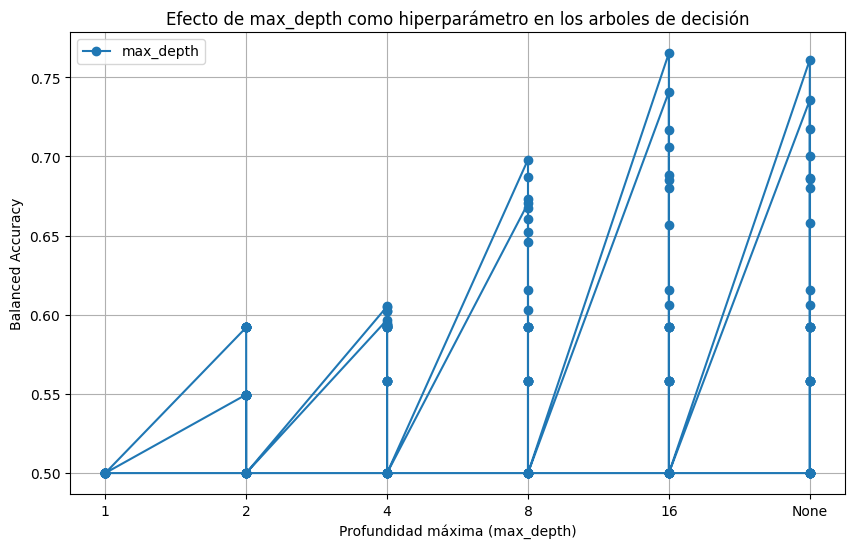

In [49]:
resultados = grid.cv_results_

max_depth = resultados['param_classifier__max_depth'].data
scores = resultados['mean_test_score']

# Convertir a string para evitar problemas con None
max_depth = max_depth.astype(str)

max_depth_values = np.unique(max_depth)

# Crear los gráficos de líneas
plt.figure(figsize=(10, 6))
plt.plot(max_depth, scores, label='max_depth', marker='o')
plt.xlabel('Profundidad máxima (max_depth)')
plt.ylabel('Balanced Accuracy')
plt.title('Efecto de max_depth como hiperparámetro en los arboles de decisión')
plt.legend()
plt.grid(True)
plt.show()


Cuanto mayor es max_depth más balanced accuracy tiene el modelo, por lo que lo mejor será dejarla en None para que tenga profundidad máxima ilimitada.

## *__5. MODELOS LINEALES Y SVMS__*